In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [183]:
mergedTrialData_df = pd.read_csv("mergedTrialData.csv")
demographics_df = pd.read_csv("demographic.csv")

In [184]:
TrialData_df = mergedTrialData_df.merge(demographics_df, on='subject').rename(columns={' group': 'group'})
TrialData_df.head()

,subject,trial,condition,ITI,rejected,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,...,FC3_B1,FC4_B1,C3_B1,C4_B1,CP3_B1,CP4_B1,group,gender,age,education
0,1,1,1,NaN,0,-9.761338,-11.545219,-16.775214,-3.576595,-11.745167,...,-13.285282,-23.223037,-23.622596,-19.071931,-19.529142,-26.677147,0,M,44,16.0
1,1,2,1,2025.3906,0,8.717519,11.462619,7.979110,9.429738,6.912862,...,13.442292,16.981404,11.953868,10.168470,5.831319,6.503993,0,M,44,16.0
2,1,3,1,2303.7109,0,-4.027286,-3.992038,-1.104119,-3.319471,0.321314,...,1.199502,0.929950,1.343815,3.131847,3.691148,0.338882,0,M,44,16.0
3,1,4,1,2275.3906,0,0.394095,-0.663186,-1.372871,3.974643,-1.613667,...,5.336565,-0.448384,7.983687,6.579145,8.474662,9.381523,0,M,44,16.0
4,1,5,1,2464.8438,0,-9.368090,-12.029829,-10.280100,-7.846471,-8.170986,...,0.212776,-5.815893,2.517058,-1.101036,-4.325141,-4.832745,0,M,44,16.0


In [185]:
TrialData_all_df = TrialData_df.drop(columns=['subject','trial','condition','ITI','rejected',' gender',' age',' education'])
all_data = TrialData_all_df.to_numpy()
all_data_NO_nan = (all_data[~np.isnan(all_data).any(axis=1)])
np.shape(all_data_NO_nan)

(23201, 37)

In [186]:
X = all_data_NO_nan[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,
                       33,34,35]]
print(np.shape(X))
y = all_data_NO_nan[:,[36]]
print(np.shape(y))

(23201, 36)
(23201, 1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 614, 
                                                    shuffle=True,
                                                    stratify=y)

In [188]:
forest_all = RandomForestClassifier(random_state=614)

forest_all.fit(X_train,y_train.ravel())

RandomForestClassifier(random_state=614)

In [189]:
y_predict = forest_all.predict(X_test)
print("accuracy", accuracy_score(y_test,y_predict))
print('precision', precision_score(y_test,y_predict))
print('recall',recall_score(y_test,y_predict))

accuracy 0.6069643164971557
precision 0.6242833742833743
recall 0.8726388093875215


In [190]:
forest_all.feature_importances_

array([0.02879593, 0.02830073, 0.02765919, 0.02781548, 0.03221536,
       0.02760993, 0.02883111, 0.02802946, 0.02769693, 0.02869763,
       0.02750456, 0.02793048, 0.03005003, 0.03080442, 0.02919064,
       0.02858174, 0.02795764, 0.02810314, 0.0250328 , 0.02486581,
       0.02522973, 0.02550416, 0.02644106, 0.02656759, 0.02554092,
       0.02694108, 0.02624502, 0.02744836, 0.02709713, 0.02703042,
       0.02782509, 0.02922322, 0.02705276, 0.02811188, 0.02918326,
       0.02888532])

In [191]:
names = []
scores = []
X_train_copy = pd.DataFrame(data=X_train, columns = TrialData_all_df.columns.drop(['group']))

for name, score in zip(X_train_copy.columns,forest_all.feature_importances_):
    names.append(name)
    scores.append(np.round(score,4))
    
score_df = pd.DataFrame({'feature':names,'importance_score':scores})

score_df.sort_values('importance_score',ascending=False)

,feature,importance_score
4,FC4_N100,0.0322
13,FC4_P200,0.0308
12,FC3_P200,0.0301
34,CP3_B1,0.0292
31,FC4_B1,0.0292
14,C3_P200,0.0292
35,CP4_B1,0.0289
0,Fz_N100,0.0288
6,C4_N100,0.0288
9,Fz_P200,0.0287


C3_N100          AxesSubplot(0.1,0.15;0.0754717x0.75)
C4_N100     AxesSubplot(0.190566,0.15;0.0754717x0.75)
CP3_N100    AxesSubplot(0.281132,0.15;0.0754717x0.75)
CP4_N100    AxesSubplot(0.371698,0.15;0.0754717x0.75)
Cz_N100     AxesSubplot(0.462264,0.15;0.0754717x0.75)
FC3_N100     AxesSubplot(0.55283,0.15;0.0754717x0.75)
FC4_N100    AxesSubplot(0.643396,0.15;0.0754717x0.75)
FCz_N100    AxesSubplot(0.733962,0.15;0.0754717x0.75)
Fz_N100     AxesSubplot(0.824528,0.15;0.0754717x0.75)
dtype: object

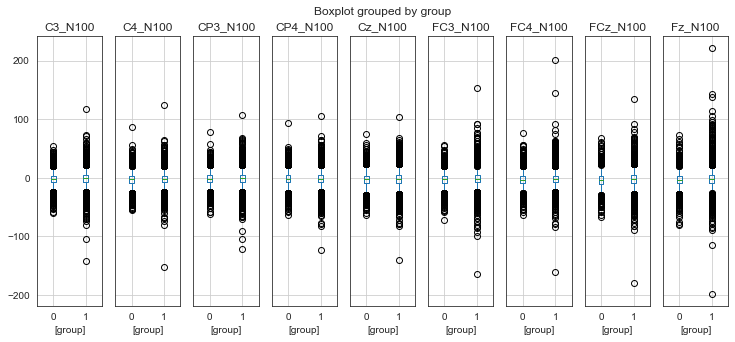

In [133]:
N100 = TrialData_df[['Fz_N100','FCz_N100','Cz_N100','FC3_N100',
                     'FC4_N100','C3_N100','C4_N100','CP3_N100',
                     'CP4_N100','group']]

fig, axes = plt.subplots(ncols=9, figsize=(12, 5), sharey=True)
N100.query("group in [0, 1]").boxplot(by='group', return_type='axes', ax=axes)

In [135]:
data_N100 = N100.to_numpy()
data_N100_NO_nan = (data_N100[~np.isnan(data_N100).any(axis=1)])
np.shape(data_NO_nan)

(23201, 10)

In [136]:
X = data_N100_NO_nan[:,[0,1,2,3,4,5,6,7,8]]
print(np.shape(X))
y = data_N100_NO_nan[:,[9]]
print(np.shape(y))

(23201, 9)
(23201, 1)


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 614, 
                                                    shuffle=True,
                                                    stratify=y)

In [139]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [140]:
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier(n_neighbors=3)

In [141]:
y_predict = knn.predict(X_test)
print("accuracy", accuracy_score(y_test,y_predict))
print('precision', precision_score(y_test,y_predict))
print('recall',recall_score(y_test,y_predict))

accuracy 0.5604206171349767
precision 0.6288913162206444
recall 0.659129937034917


In [83]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
tree = DecisionTreeClassifier(max_depth = 20, random_state = 440)
tree.fit(X_train,y_train) 

DecisionTreeClassifier(max_depth=20, random_state=440)

In [143]:
y_predict = tree.predict(X_test)
print("accuracy", accuracy_score(y_test,y_predict))
print('precision', precision_score(y_test,y_predict))
print('recall',recall_score(y_test,y_predict))

accuracy 0.5592139286329944
precision 0.6175658720200753
recall 0.704350314825415


In [89]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
forest = RandomForestClassifier(max_depth = 15, random_state=614)

forest.fit(X_train,y_train.ravel())

RandomForestClassifier(max_depth=15, random_state=614)

In [145]:
y_predict = forest.predict(X_test)
print("accuracy", accuracy_score(y_test,y_predict))
print('precision', precision_score(y_test,y_predict))
print('recall',recall_score(y_test,y_predict))

accuracy 0.6078262368557146
precision 0.6145892084978379
recall 0.9356038923869491


In [ ]:
(1) pressed a button to immediately generated a tone, 
(2) passively listened to the same tone, or 
(3) pressed a button without generating a tone 

In [192]:
Button_Tone_Press_df = TrialData_df[TrialData_df.condition == 1]

In [193]:
Button_Tone_Press_all_df = Button_Tone_Press_df.drop(columns=['subject','trial','condition',
                                                      'ITI','rejected',' gender',' age',' education'])
BTP_all_data = Button_Tone_Press_all_df.to_numpy()
BTP_all_data_NO_nan = (BTP_all_data[~np.isnan(BTP_all_data).any(axis=1)])
np.shape(BTP_all_data_NO_nan)

(7836, 37)

In [194]:
X = BTP_all_data_NO_nan[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,
                       33,34,35]]
print(np.shape(X))
y = BTP_all_data_NO_nan[:,[36]]
print(np.shape(y))

(7836, 36)
(7836, 1)


In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 614, 
                                                    shuffle=True,
                                                    stratify=y)

In [196]:
forest_BTP_all = RandomForestClassifier(random_state=614)

forest_BTP_all.fit(X_train,y_train.ravel())

RandomForestClassifier(random_state=614)

In [197]:
y_predict = forest_BTP_all.predict(X_test)
print("accuracy", accuracy_score(y_test,y_predict))
print('precision', precision_score(y_test,y_predict))
print('recall',recall_score(y_test,y_predict))

accuracy 0.6094946401225115
precision 0.6284658040665434
recall 0.8629441624365483


In [198]:
forest_BTP_all.feature_importances_

array([0.02872896, 0.02750108, 0.02644221, 0.02687955, 0.03253504,
       0.02624169, 0.03026188, 0.02702828, 0.02643054, 0.03153741,
       0.0283625 , 0.02840376, 0.02930409, 0.03112087, 0.0292765 ,
       0.02820804, 0.02901083, 0.02864965, 0.0259908 , 0.02498781,
       0.02509227, 0.02542434, 0.02639308, 0.02540608, 0.02485206,
       0.02707289, 0.02776663, 0.0277042 , 0.02859568, 0.02772797,
       0.02772075, 0.0280012 , 0.02819861, 0.02709014, 0.02714253,
       0.02891009])

In [199]:
names = []
scores = []
X_train_copy = pd.DataFrame(data=X_train, columns = TrialData_all_df.columns.drop(['group']))

for name, score in zip(X_train_copy.columns,forest_BTP_all.feature_importances_):
    names.append(name)
    scores.append(np.round(score,4))
    
score_df = pd.DataFrame({'feature':names,'importance_score':scores})

score_df.sort_values('importance_score',ascending=False)

,feature,importance_score
4,FC4_N100,0.0325
9,Fz_P200,0.0315
13,FC4_P200,0.0311
6,C4_N100,0.0303
14,C3_P200,0.0293
12,FC3_P200,0.0293
16,CP3_P200,0.0290
35,CP4_B1,0.0289
0,Fz_N100,0.0287
28,FCz_B1,0.0286


C:\Users\aleks\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:380: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


C3_N100          AxesSubplot(0.1,0.15;0.0754717x0.75)
C4_N100     AxesSubplot(0.190566,0.15;0.0754717x0.75)
CP3_N100    AxesSubplot(0.281132,0.15;0.0754717x0.75)
CP4_N100    AxesSubplot(0.371698,0.15;0.0754717x0.75)
Cz_N100     AxesSubplot(0.462264,0.15;0.0754717x0.75)
FC3_N100     AxesSubplot(0.55283,0.15;0.0754717x0.75)
FC4_N100    AxesSubplot(0.643396,0.15;0.0754717x0.75)
FCz_N100    AxesSubplot(0.733962,0.15;0.0754717x0.75)
Fz_N100     AxesSubplot(0.824528,0.15;0.0754717x0.75)
dtype: object

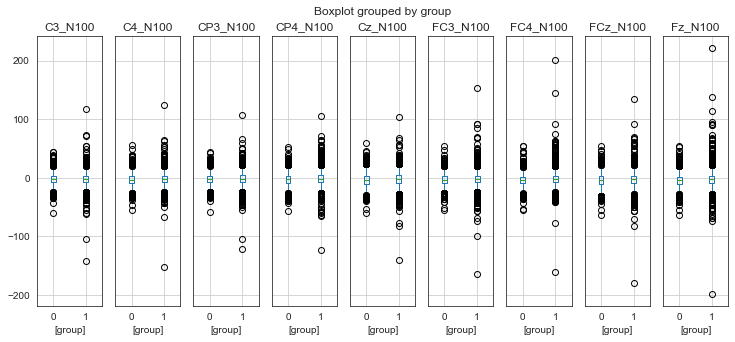

In [148]:
N100_BTP = Button_Tone_Press_df[['Fz_N100','FCz_N100','Cz_N100','FC3_N100',
                     'FC4_N100','C3_N100','C4_N100','CP3_N100',
                     'CP4_N100','group']]

fig, axes = plt.subplots(ncols=9, figsize=(12, 5), sharey=True)
N100_BTP.query("group in [0, 1]").boxplot(by='group', return_type='axes', ax=axes)

In [ ]:
data_N100_BTP = N100_BTP.to_numpy()
data_N100_BTP_NO_nan = (data_N100[~np.isnan(data_N100).any(axis=1)])
np.shape(data_N100_BTP_NO_nan)

In [ ]:
X = data_N100_BTP_NO_nan[:,[0,1,2,3,4,5,6,7,8]]
print(np.shape(X))
y = data_N100_BTP_NO_nan[:,[9]]
print(np.shape(y))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 614, 
                                                    shuffle=True,
                                                    stratify=y)